<a href="https://colab.research.google.com/github/Shashwat26Bhatnagar/Myprofile/blob/main/FFT_for_PDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm#color map
plt.rcParams['figure.figsize']=[12,12]
plt.rcParams.update({"font.size":18})

a=1 #thermal diffusivity constant
L=100 #length of domain
N=1000#number of discreate points
dx=L/N
x=np.arange(-L/2,L/2,dx)
n=len(x)

#define a discreate wavenumber
kappa=(2*np.pi/L)*np.arange(-n/2,n/2)
kappa=np.fft.fftshift(kappa)

#initial condition
u0=np.zeros_like(x)
u0[int((L/2-L/10)/dx):int((L/2+L/10)/dx)]=1
u0hat=np.fft.fft(u0)

#Scipy odeint function can't handle complex numbers efficently so we are are going to remove them
u0hat_ri=np.concatenate((u0hat.real,u0hat.imag))

In [7]:
#stimulate in fourier freq domain
dt=0.1
t=np.arange(0,10,dt)
def rhsHeat(u0hat_ri,t,kappa,a):
  uhat=u0hat_ri[:N]+(1j)*u0hat_ri[N:]
  d_uhat=-a**2*(np.power(kappa,2))*uhat
  d_uhat_ri=np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
  return d_uhat_ri
uhat_ri=odeint(rhsHeat,u0hat_ri,t,args=(kappa,a))
uhat=uhat_ri[:,:N]+(1j)*uhat_ri[:,N:]
u=np.zeros_like(uhat)
for k in range(len(t)):
  u[k,:]=np.fft.ifft(uhat[k,:])
u=u.real

(10, 1000)


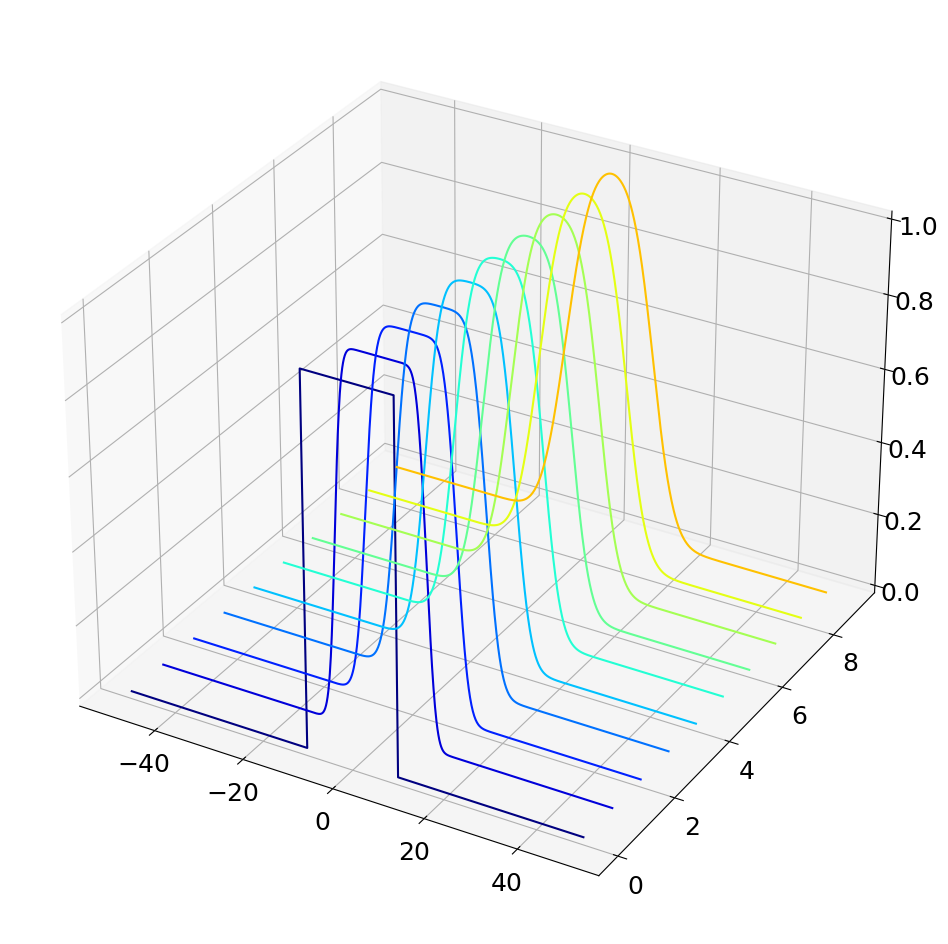

In [12]:
#waterfall plot
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
plt.set_cmap('jet_r')
u_plot=u[0:-1:10,:]
print(u_plot.shape)
for j in range(u_plot.shape[0]):
  ys=j*np.ones(u_plot.shape[1])
  ax.plot(x,ys,u_plot[j,:],color=cm.jet(j*20))


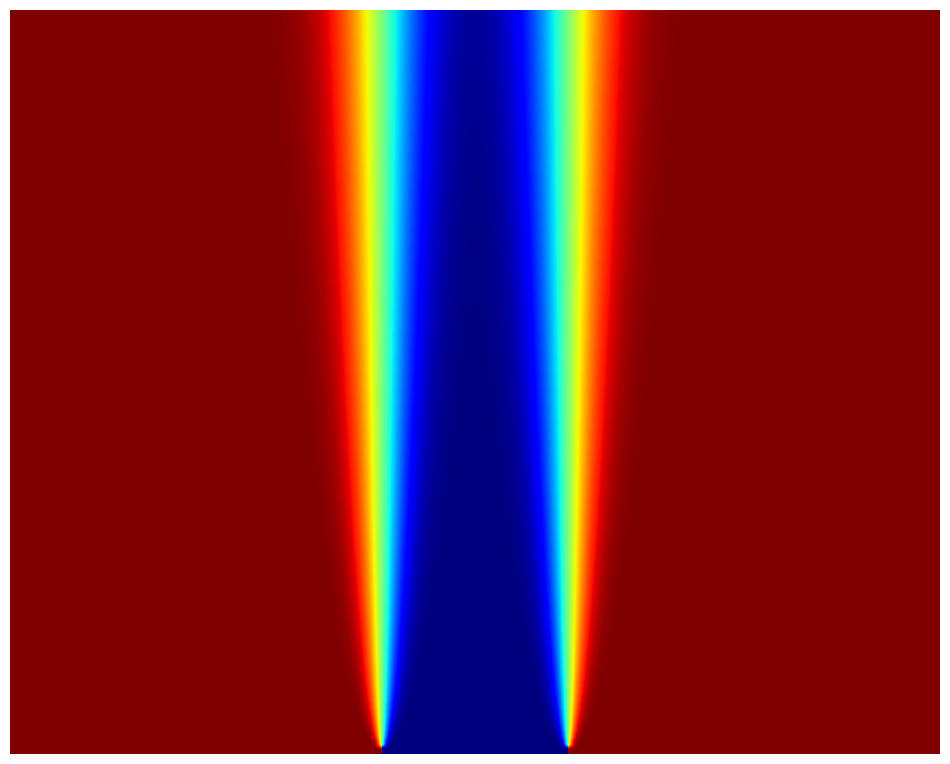

In [13]:
#image plot
plt.figure()
plt.imshow(np.flipud(u),aspect=8)
plt.axis("off")
plt.set_cmap("jet_r")
plt.show()